In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels as sm

In [2]:
df = pd.read_csv('data/electric_demand/energy_dataset.csv')

In [3]:
df = df[['time','total load actual']]

temp_s = pd.to_datetime(df['time'])
temp_s = temp_s.apply(lambda x: x.strftime('%Y-%m'))

df['time'] = temp_s

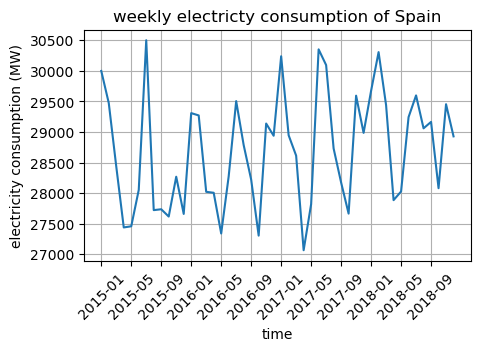

In [18]:
temp_df = df.groupby('time').agg('mean').reset_index()

plt.figure(figsize=(5,3))
plt.plot(temp_df.time, temp_df['total load actual'])
plt.xticks(np.arange(len(temp_df['time']))[::4],temp_df['time'][::4])
plt.tick_params(axis='x', labelrotation=45)
plt.xlabel('time')
plt.ylabel('electricity consumption (MW)')
plt.title('weekly electricty consumption of Spain')
plt.grid()
plt.show()

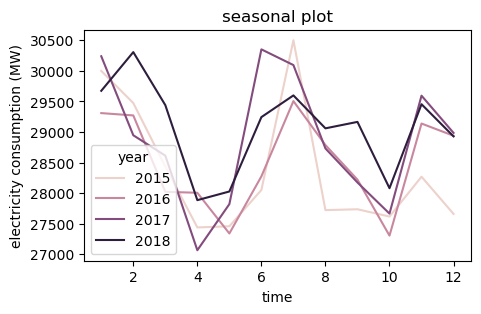

In [8]:
plt.figure(figsize=(5,3))
temp_df['month'] = temp_df['time'].apply(lambda x: pd.to_datetime(x).date().month)
temp_df['year'] = temp_df['time'].apply(lambda x: pd.to_datetime(x).date().year)
sns.lineplot(data=temp_df, x='month', y='total load actual', hue='year', legend='full')
plt.title('seasonal plot')
plt.xlabel('time')
plt.ylabel('electricity consumption (MW)')
plt.show()

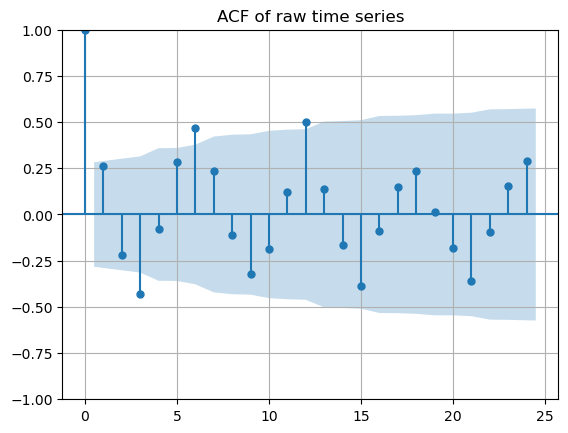

In [16]:
# acf
import statsmodels as sm
sm.graphics.tsaplots.plot_acf(temp_df['total load actual'].values, lags=24)
plt.grid()
plt.title('ACF of raw time series')
plt.show()

forecasting efforts below

In [3]:
df = df[['time','total load actual']]

In [7]:
temp_s = pd.to_datetime(df['time'])
temp_s = temp_s.apply(lambda x: x.strftime('%Y-%m-%d'))
df['time'] = temp_s

temp_df = df.groupby('time').agg('mean').reset_index()

In [14]:
train_df = temp_df.iloc[:1000]
valid_df = temp_df.iloc[1000:1100]
test_df = temp_df.iloc[1100:]

In [15]:
# define performance metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

def rmse(y_true, y_pred):
    return mean_squared_error(y_true,y_pred,squared=False)

def mae(y_true, y_pred):
    return mean_absolute_error(y_true, y_pred)

def mape(y_true, y_pred):
    return mean_absolute_percentage_error(y_true, y_pred)

,time,total load actual
0,2015-01-01,23896.750000
1,2015-01-02,27251.291667
2,2015-01-03,25110.666667
3,2015-01-04,27112.625000
4,2015-01-05,22559.444444
...,...,...
995,2017-09-22,29082.625000
996,2017-09-23,26100.041667
997,2017-09-24,24071.791667
998,2017-09-25,28518.041667
